## Import Data

In [1]:
%matplotlib notebook
import locale
from locale import atof
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

locale.setlocale(locale.LC_NUMERIC, '')

BTC_df = pd.read_csv("BitcoinHistoricalData_coinmarketcap.csv", sep = '\t', thousands=',')
ETH_df = pd.read_csv("EthereumHistoricalData_coinmarketcap.csv", sep = '\t', thousands=',')
BC_Events_df = pd.read_csv("BlockchainEvents_2016_May.csv", sep = '\t', thousands=',')

BTC_df['Date'] = pd.to_datetime(BTC_df['Date'])
BTC_df.set_index(['Date'],inplace=True)
BTC_df.sort_index(inplace=True)
BTC_df['Volume'] = BTC_df['Volume'].replace('-', np.NaN)
BTC_df.dropna(inplace=True)
BTC_df['Volume'] = BTC_df['Volume'].apply(atof)
BTC_df['Volume'] = BTC_df['Volume'].astype(int)

BC_Events_df['Date'] = pd.to_datetime(BC_Events_df['Date'])

ETH_df['Date'] = pd.to_datetime(ETH_df['Date'])
ETH_df.set_index(['Date'], inplace=True)
ETH_df.sort_index(inplace=True)
ETH_df['Market Cap'] = ETH_df['Market Cap'].replace('-', np.NaN)
ETH_df.dropna(inplace=True)
ETH_df['Market Cap'] = ETH_df['Market Cap'].apply(atof)

In [2]:
ETH_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,1.679110e+08
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,4.263760e+07
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,4.313000e+07
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,4.279650e+07
2015-08-12,1.060000,1.290000,0.883608,1.220000,2150620,6.401840e+07
2015-08-13,1.220000,1.970000,1.170000,1.830000,4068680,7.393540e+07
2015-08-14,1.810000,2.260000,1.750000,1.830000,4637030,1.095940e+08
2015-08-15,1.800000,1.880000,1.570000,1.690000,2554360,1.091600e+08
2015-08-16,1.680000,1.700000,1.090000,1.570000,3550790,1.020280e+08


## PLOTTING

<IPython.core.display.Javascript object>


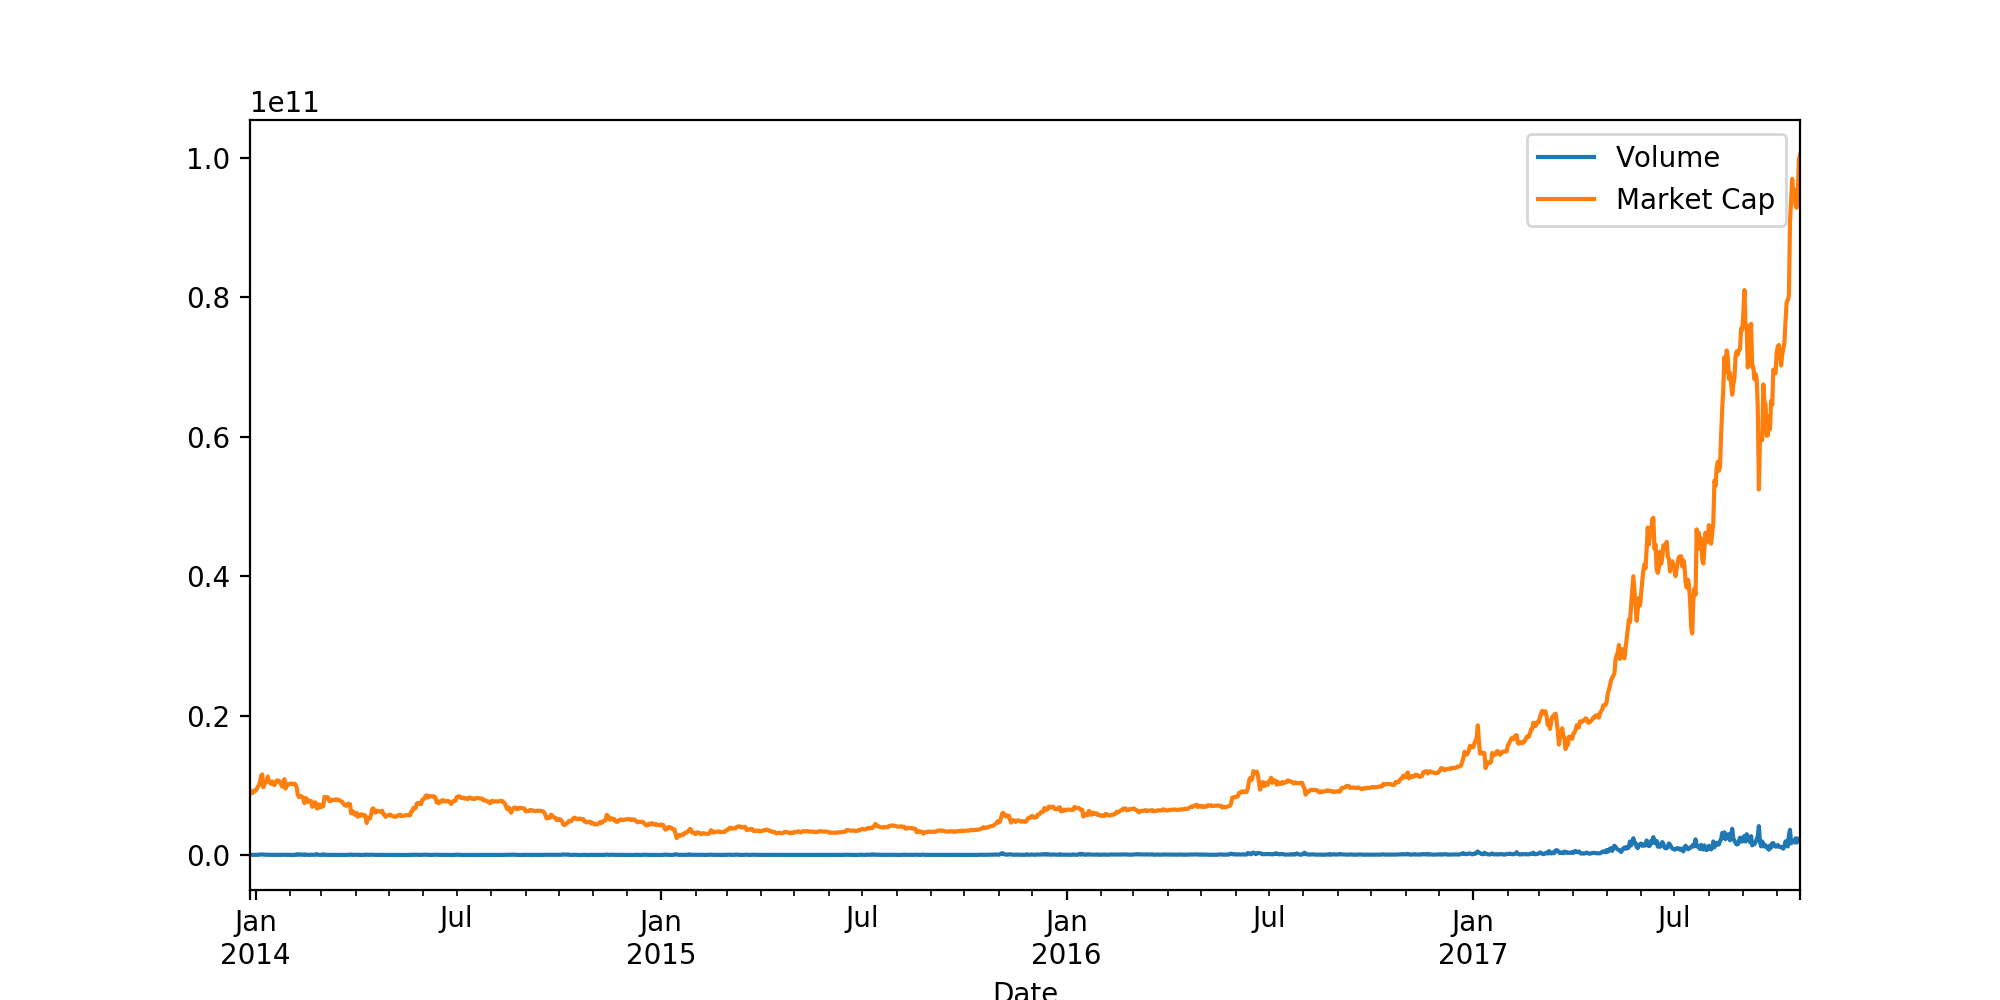

In [3]:
BTC_df.plot(y=['Volume', 'Market Cap'], figsize=(10,5))

<IPython.core.display.Javascript object>


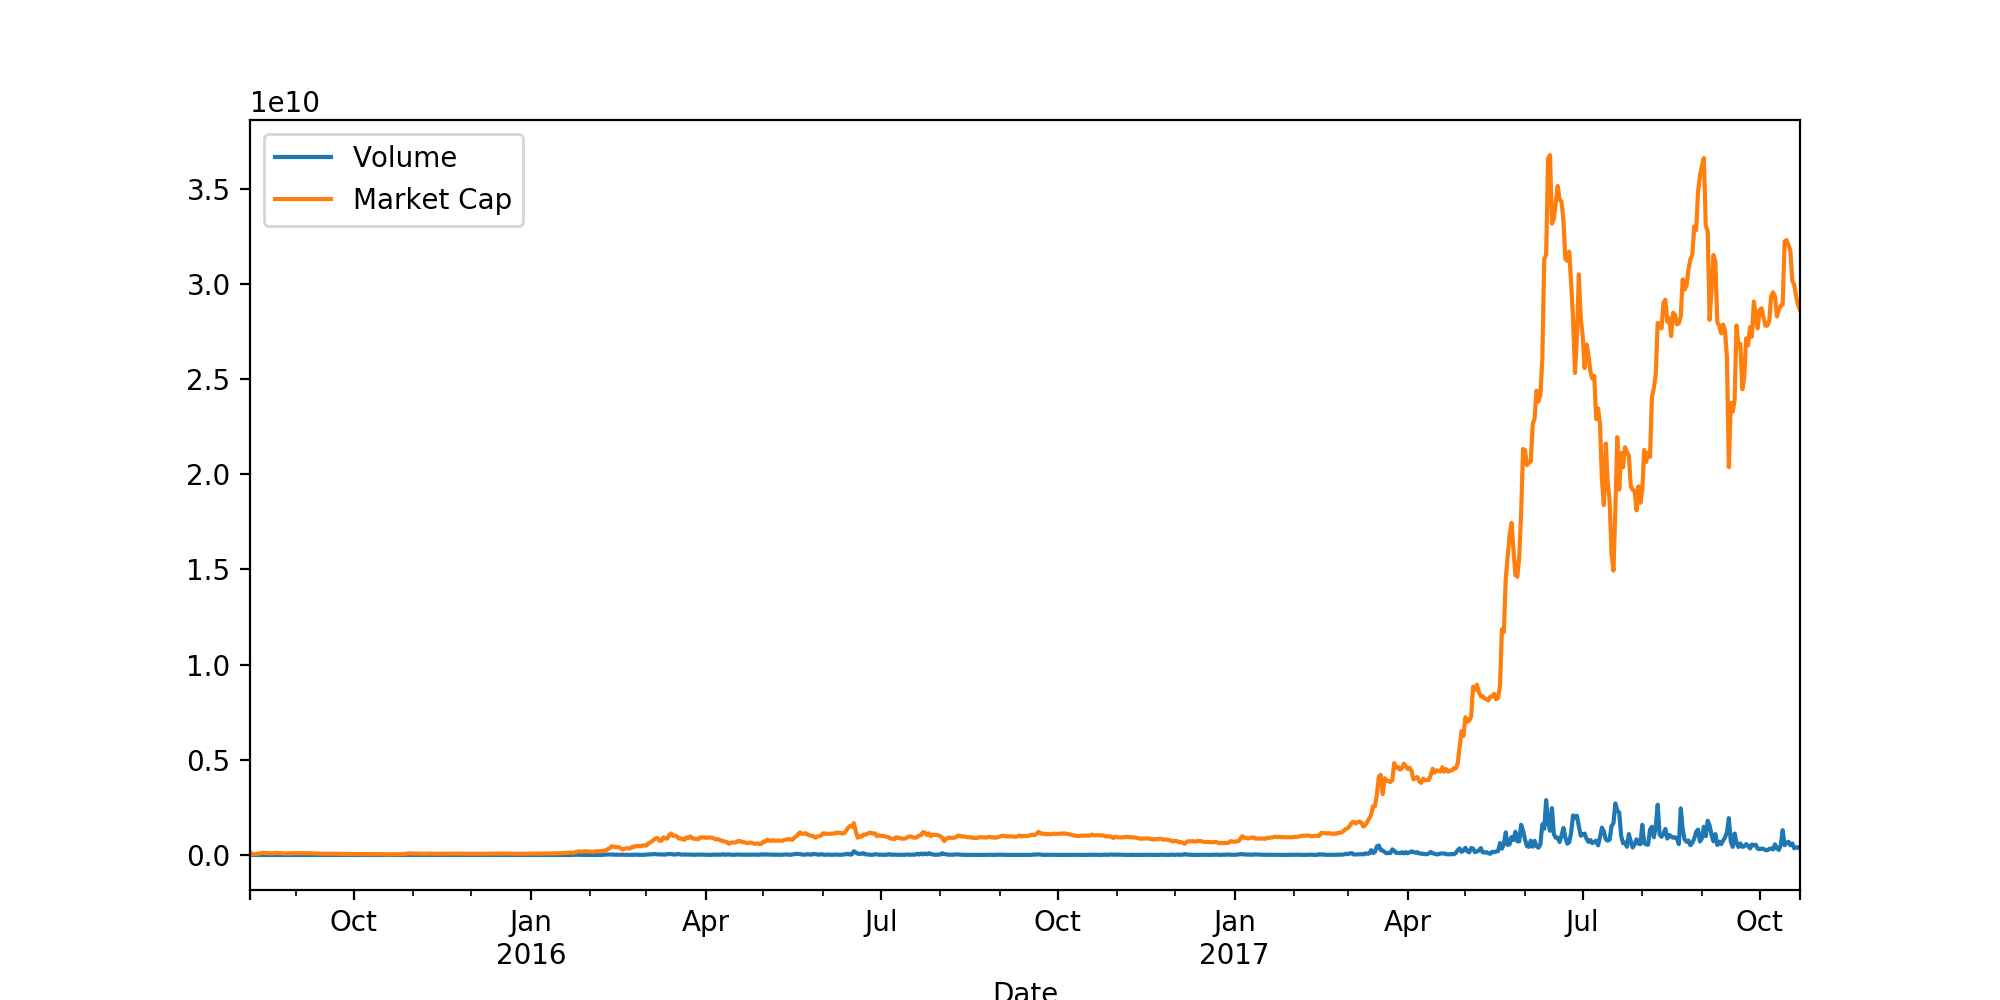

In [4]:
ETH_df.plot(y=['Volume', 'Market Cap'], figsize=(10,5))

<IPython.core.display.Javascript object>


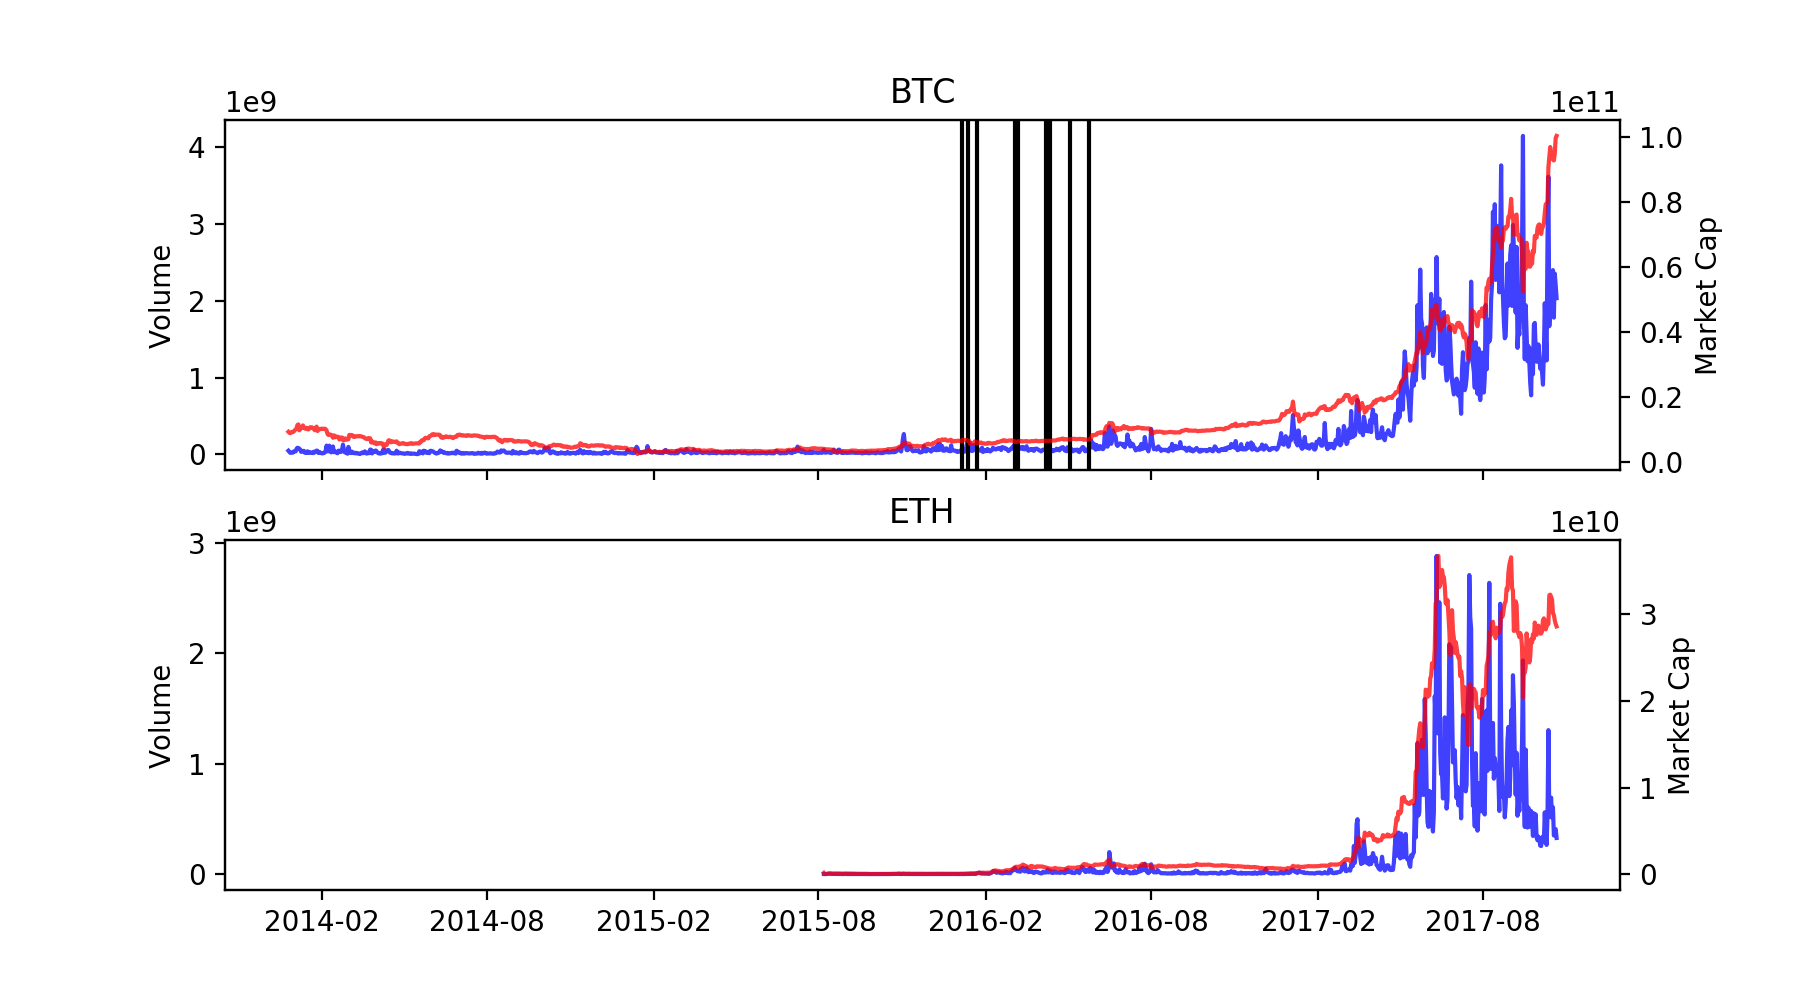

In [5]:
#BTC_df = BTC_df[BTC_df.index > '2016-01-01']
BTC_Dates = np.arange(min(BTC_df.index) - pd.DateOffset(1), max(BTC_df.index), dtype='datetime64[D]')

fig, (ax1, ax3) = plt.subplots(2, 1, sharex = True, figsize=(9,5))
ax2 = ax1.twinx()

x1 = list(map(pd.to_datetime, BTC_Dates))
x1 = [dt.datetime.strptime(str(d),'%Y-%m-%d 00:00:00') for d in x1]

y1 = BTC_df['Volume']
y2 = BTC_df['Market Cap']

line1, = ax1.plot(x1,y1, 'b', alpha =0.75)
line2, = ax2.plot(x1,y2, 'r', alpha =0.75)

ax1.set_ylabel('Volume', color='k')
ax2.set_ylabel('Market Cap', color='k')
#ax1.fill_between(x, y1, y2, facecolor='grey', alpha=0.25)

ETH_Dates = np.arange(min(ETH_df.index) - pd.DateOffset(1), max(ETH_df.index), dtype='datetime64[D]')
ax4 = ax3.twinx()
x2 = list(map(pd.to_datetime, ETH_Dates))
x2 = [dt.datetime.strptime(str(d),'%Y-%m-%d 00:00:00') for d in x2]

y3 = ETH_df['Volume']
y4 = ETH_df['Market Cap']

line3, = ax3.plot(x2,y3, 'b', alpha =0.75)
line4, = ax4.plot(x2,y4, 'r', alpha =0.75)

ax3.set_ylabel('Volume', color='k')
ax4.set_ylabel('Market Cap', color='k')
#ax1.fill_between(x, y1, y2, facecolor='grey', alpha=0.25)


ax1.set_title('BTC')
ax3.set_title('ETH')

for d in BC_Events_df['Date']:
    ax1.axvline(x=d, color='k')
    #plt.text()

## ML modeling

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

## BITCOIN CLOSING PRICE
X = BTC_df[['Volume', 'Market Cap', 'Open', 'High', 'Low']].copy()
#X = BTC_df[['Volume', 'Market Cap']]
#y = BTC_df['Open']
y = BTC_df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Dummy Regression
#dr = DummyRegressor().fit(X_train, y_train)
#print ('Dummy Regression: ', 'Train: ', r2_score(y_train, dr.predict(X_train)))
#print ('Test: ', r2_score(y_test, dr.predict(X_test)))
#Logistic Regression
lrc = LinearRegression().fit(X_train, y_train)
print ('Linear Regression (BTC):')
print ('\tTrain (r2_score): ', r2_score(y_train, lrc.predict(X_train)))
print ('\tTest (r2_score): ', r2_score(y_test, lrc.predict(X_test)))
#print ('\tTrain (explained_variance_score): ', explained_variance_score(y_train, lrc.predict(X_train)))
#print ('\tTest (explained_variance_score): ', explained_variance_score(y_test, lrc.predict(X_test)))
#Random Forest Regression
rfr = RandomForestRegressor(n_estimators = 300, max_depth=15, random_state=0).fit(X_train, y_train)
print ('Random Forest Regression (BTC): ')
print('\tTrain (r2 score): ', r2_score(y_train, rfr.predict(X_train)))
print('\tTest (r2 score): ', r2_score(y_test, rfr.predict(X_test)))

### ETHEREUM PRICE
#X_ETH = ETH_df[['Volume', 'Market Cap', 'Open', 'High', 'Low']].copy()
ETH_df['Avg Price'] = (ETH_df['High']+ETH_df['Low'])/2
ETH_df['Nodes'] = ETH_df['Market Cap']/ETH_df['Avg Price']
X_ETH = ETH_df[['Volume', 'Market Cap']]
#X_ETH = ETH_df[['Volume', 'Nodes']]
y_ETH = ETH_df['Close']
X_ETH_train, X_ETH_test, y_ETH_train, y_ETH_test = train_test_split(X_ETH, y_ETH, random_state=0)
#Dummy Regression
#dr2 = DummyRegressor().fit(X_ETH_train, y_ETH_train)
#print ('Dummy Regression: ', 'Train: ', r2_score(y_ETH_train, dr2.predict(X_ETH_train)))
#print ('Test: ', r2_score(y_ETH_test, dr2.predict(X_ETH_test)))
#Logistic Regression
lrc2 = LinearRegression().fit(X_ETH_train, y_ETH_train)
print ('Linear Regression (ETH): ')
print('\tTrain (r2 score): ', r2_score(y_ETH_train, lrc2.predict(X_ETH_train)))
print ('\tTest (r2 score): ', r2_score(y_ETH_test, lrc2.predict(X_ETH_test)))
#Random Forest Regression
rfr2 = RandomForestRegressor(n_estimators = 50, max_depth=10, random_state=0).fit(X_ETH_train, y_ETH_train)
print ('Random Forest Regression (ETH): ')
print('\tTrain (r2 score): ', r2_score(y_ETH_train, rfr2.predict(X_ETH_train)))
print ('\tTest (r2 score): ', r2_score(y_ETH_test, rfr2.predict(X_ETH_test)))

Linear Regression (BTC):
	Train (r2_score):  0.999398070356
	Test (r2_score):  0.99937107661
Random Forest Regression (BTC): 
	Train (r2 score):  0.999722844921
	Test (r2 score):  0.998911886982
Linear Regression (ETH): 
	Train (r2 score):  0.995044076917
	Test (r2 score):  0.993819040319
Random Forest Regression (ETH): 
	Train (r2 score):  0.999057591239
	Test (r2 score):  0.991549716921


In [72]:
cur_BTC = [[2401840000, 99941600000, 6006.00, 6075.59, 5732.47]]
lrc.predict(cur_BTC)

array([ 5870.21733748])

In [73]:
cur_ETH = [[482336000, 28111400000]]
lrc2.predict(cur_ETH)

array([ 296.32666611])

In [9]:
#explained_variance_score([5930.32], lrc.predict(cur_BTC))
#r2_score([5930.32], lrc.predict(cur_BTC))

In [70]:
cols = ['Coin', 'Date', 'Close', 'Market Cap', 'Volume' ]
eth_data = []
btc_data = []
for grp, frame in ETH_df.groupby(ETH_df.index.year):
    for grp1, frame1 in frame.groupby(frame.index.month):
        eth_data.append(['ETH', str(grp)+'/'+str(grp1), np.mean(frame1['Close']), np.mean(frame1['Market Cap']), np.mean(frame1['Volume'])])        
for grp2, frame2 in BTC_df.groupby(BTC_df.index.year):
    for grp3, frame3 in frame2.groupby(frame2.index.month):
        btc_data.append(['BTC', str(grp2)+'/'+str(grp3), np.mean(frame3['Close']), np.mean(frame3['Market Cap']), np.mean(frame3['Volume'])])        

ETH_df1 = pd.DataFrame(eth_data, columns = cols)
BTC_df1 = pd.DataFrame(btc_data, columns = cols)
#Coin_df1.append(Coin_df, ignore_index = True)
#Coin_df2 = Coin_df1.merge(Coin_df, on='Date', how='left')
Coin_df = pd.concat([BTC_df1, ETH_df1], ignore_index = True)
Coin_df

,Coin,Date,Close,Market Cap,Volume
0,BTC,2013/12,743.618000,9.092852e+09,2.799696e+07
1,BTC,2014/1,844.168387,1.032151e+10,3.720602e+07
2,BTC,2014/2,661.618214,8.312295e+09,4.534594e+07
3,BTC,2014/3,592.200323,7.457668e+09,2.464449e+07
4,BTC,2014/4,461.362000,5.839682e+09,2.631014e+07
5,BTC,2014/5,486.651290,6.145906e+09,1.623545e+07
6,BTC,2014/6,615.917333,7.935543e+09,2.406244e+07
7,BTC,2014/7,618.025484,8.071056e+09,1.453954e+07
8,BTC,2014/8,536.087742,7.093395e+09,2.240402e+07
9,BTC,2014/9,445.186333,5.945528e+09,2.321907e+07


In [ ]:
#BTC_df = BTC_df[BTC_df.index > '2016-01-01']
#BTC_Dates = np.arange(min(BTC_df.index) - pd.DateOffset(1), max(BTC_df.index), dtype='datetime64[D]')

fig, (ax1, ax3) = plt.subplots(2, 1, sharex = True, figsize=(9,5))
ax2 = ax1.twinx()

x1 = list(map(pd.to_datetime, BTC_Dates))
x1 = [dt.datetime.strptime(str(d),'%Y-%m-%d 00:00:00') for d in x1]

y1 = BTC_df['Volume']
y2 = BTC_df['Market Cap']

line1, = ax1.plot(x1,y1, 'b', alpha =0.75)
line2, = ax2.plot(x1,y2, 'r', alpha =0.75)

ax1.set_ylabel('Volume', color='k')
ax2.set_ylabel('Market Cap', color='k')
#ax1.fill_between(x, y1, y2, facecolor='grey', alpha=0.25)

#ETH_Dates = np.arange(min(ETH_df.index) - pd.DateOffset(1), max(ETH_df.index), dtype='datetime64[D]')
ax4 = ax3.twinx()
x2 = list(map(pd.to_datetime, ETH_Dates))
x2 = [dt.datetime.strptime(str(d),'%Y-%m-%d 00:00:00') for d in x2]

y3 = ETH_df['Volume']
y4 = ETH_df['Market Cap']

line3, = ax3.plot(x2,y3, 'b', alpha =0.75)
line4, = ax4.plot(x2,y4, 'r', alpha =0.75)

ax3.set_ylabel('Volume', color='k')
ax4.set_ylabel('Market Cap', color='k')
#ax1.fill_between(x, y1, y2, facecolor='grey', alpha=0.25)


ax1.set_title('BTC')
ax3.set_title('ETH')

for d in BC_Events_df['Date']:
    ax1.axvline(x=d, color='k')
    #plt.text()